<h1 style='color: red'>
    Blok kodu pobierający dataset jeżeli go nie ma w plikach
</h1>

In [ ]:
import os
from kaggle.api.kaggle_api_extended import KaggleApi

# Nazwa zestawu danych na Kaggle
dataset_name = 'diabetes_prediction_dataset'
kaggle_data_set_name = 'iammustafatz/diabetes-prediction-dataset'

# Ścieżka do danych
download_path = './data'

def download_kaggle_csv_dataset(dataset, download_path):
    os.makedirs(download_path, exist_ok=True)    
    api = KaggleApi()
    api.authenticate()
    api.dataset_download_files(dataset, path=download_path, unzip=True)

if not os.path.exists(download_path) or not os.path.exists(f'{download_path}/{dataset_name}'):
    os.makedirs(download_path)
    # Pobranie danych
    download_kaggle_csv_dataset(kaggle_data_set_name, download_path)

    print(f'Dane zostały pobrane do katalogu {download_path}/{dataset_name}')
else:
    print(f'Dane już się znajdują w katalogu {download_path}/{dataset_name}')
    

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
file_path = './data/diabetes_prediction_dataset.csv'
data = pd.read_csv(file_path)

def save_cleaned_data(cleaned_file_path = './data/diabetes_prediction_dataset_clean.csv'):
    data.to_csv(cleaned_file_path, index=False)
    print(f'Dane zostały zapisane w pliku {cleaned_file_path}'), 

Original data histograms


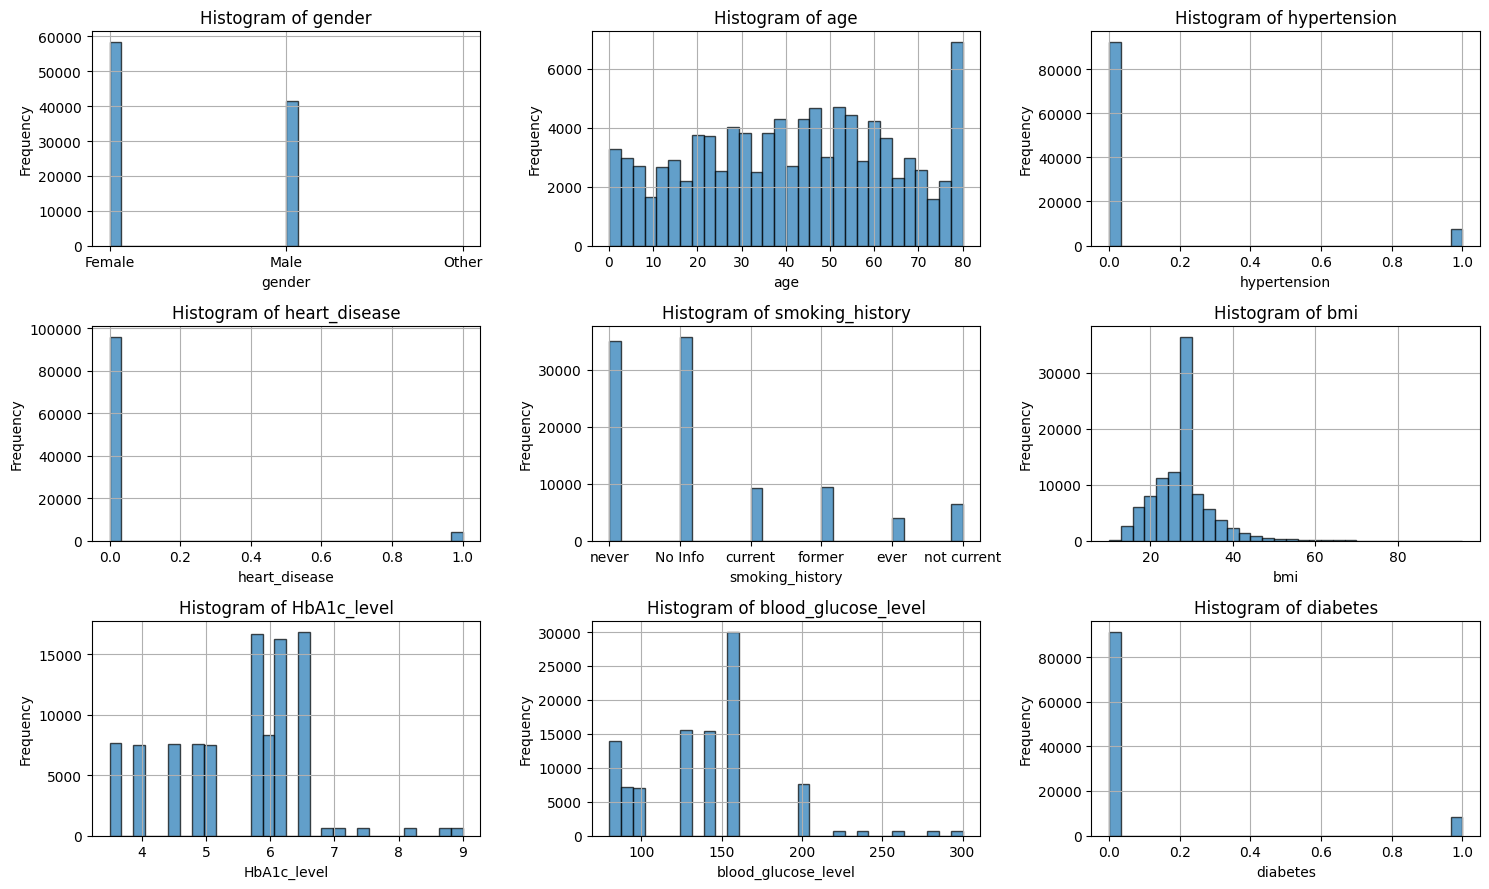

In [58]:
columns = data.columns

n_cols = 3                                                  # Liczba kolumn w siatce
n_rows = (len(columns) + n_cols - 1) // n_cols              # Liczba rzędów w siatce

# Tworzenie siatki wykresów
fig, axs = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 3 * n_rows))

# Generowanie histogramów dla każdej kolumny
for i, column in enumerate(columns):
    ax = axs[i // n_cols, i % n_cols]
    ax.hist(data[column].dropna(), bins=30, edgecolor='k', alpha=0.7)
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.grid(True)

# Usunięcie pustych wykresów, jeśli istnieją
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axs[j // n_cols, j % n_cols])

print('Original data histograms')

plt.tight_layout()
plt.show()

<h1 style='color: gold'>
    Cecha Smoking
</h1>

<h2>
    Konwersja cechy smoking_history na one-hot encode.
</h2>

In [59]:
# Wykonanie one-hot encoding dla kolumny 'smoking_history'
data = pd.get_dummies(data, columns=['smoking_history'], prefix='smoking')

save_cleaned_data()

Dane zostały zapisane do ./data/diabetes_prediction_dataset_clean.csv


<h3>
    Usunięcie próbek w których Smoking_No info == True 
</h3>

In [60]:
# Usuwanie wierszy, w których wartość kolumny smoking_No info wynosi True
data_filtered = data[data['smoking_No Info'] == False]
data = data_filtered.drop(columns=['smoking_No Info'])

save_cleaned_data()

<h1 style='color: gold'>
    Cecha gender
</h1>

<h2>
    Usunięcie próbek w których gender_Other == True
</h2>

In [61]:
# Usuwanie wierszy, w których wartość kolumny 'gender' jest 'Other'
data = data[data['gender'] != 'Other']

save_cleaned_data()

<h2>
    Podział cechy gender na one-hot, ponieważ !(Female > Male) i odwrotnie  
</h2>

In [62]:
data = pd.get_dummies(data, columns=['gender'], prefix='gender')
save_cleaned_data()

<h1 style='color: gold'>
    Cecha age
</h1>

<h2>
    Sprawdzenie unikalnych wartości w kolumnie age i zaokrąglenie ich.
</h2>

In [63]:
# słownik dla przechowywania liczności wystąpień unikatowych wartości
unique_values_counts = {}

# unikatowe wartości w kolumnie age + ich liczność
for value in data['age'].unique():
    count = data['age'].value_counts()[value]
    unique_values_counts[value] = count

print("Unikatowe wartości w kolumnie 'age' wraz z ilością ich wystąpień:")
for value, count in unique_values_counts.items():
    print(f"{value}: {count}")

Unikatowe wartości w kolumnie 'age' wraz z ilością ich wystąpień:
80.0: 3822
28.0: 1017
36.0: 900
76.0: 523
20.0: 874
44.0: 1021
42.0: 1016
32.0: 891
53.0: 1163
54.0: 1120
78.0: 486
67.0: 764
15.0: 439
37.0: 959
40.0: 1009
69.0: 705
72.0: 574
30.0: 936
45.0: 1116
43.0: 1081
41.0: 956
26.0: 917
50.0: 1080
34.0: 903
73.0: 600
77.0: 536
29.0: 994
60.0: 1073
38.0: 1084
57.0: 1145
19.0: 826
21.0: 888
59.0: 1021
27.0: 916
56.0: 1045
79.0: 426
74.0: 542
55.0: 1130
62.0: 1102
47.0: 1149
66.0: 880
68.0: 733
5.0: 145
75.0: 527
22.0: 886
58.0: 1001
24.0: 875
18.0: 700
33.0: 918
16.0: 474
46.0: 1134
61.0: 1062
31.0: 933
49.0: 1172
25.0: 889
39.0: 994
65.0: 826
14.0: 336
70.0: 655
48.0: 1143
11.0: 195
51.0: 1198
17.0: 526
9.0: 150
64.0: 819
63.0: 805
52.0: 1167
35.0: 920
2.0: 151
71.0: 640
4.0: 149
6.0: 145
3.0: 162
23.0: 916
10.0: 169
13.0: 299
1.24: 7
1.88: 11
12.0: 261
7.0: 164
8.0: 144
1.4: 10
1.16: 11
1.72: 9
0.24: 5
1.64: 8
1.32: 16
0.32: 4
0.16: 3
0.48: 4
1.8: 12
0.88: 7
0.56: 2
1.08: 5
1.0:

In [64]:
data['age'] = data['age'].round().astype(int)
save_cleaned_data()

<h1 style='color: gold'>
    Operacje na całym zbiorze.
</h1>

<h2>
    Wyszukiwanie i usuwanie niepotrzebnych duplikatów.
</h2>

In [65]:
duplicate_rows = data.duplicated()
data = data.drop_duplicates()

save_cleaned_data()
print(f'Usunięto zduplikowanych wierszy: {duplicate_rows.sum()}')

Usunięto zduplikowanych wierszy: 928


<h2>
    Unikatowe dane.
</h2>

In [66]:
for column in data.columns:
    num_dist_values = data[column].nunique()
    print(f'{column}: {num_dist_values} unique values')

age: 81 unique values
hypertension: 2 unique values
heart_disease: 2 unique values
bmi: 3943 unique values
HbA1c_level: 18 unique values
blood_glucose_level: 18 unique values
diabetes: 2 unique values
smoking_current: 2 unique values
smoking_ever: 2 unique values
smoking_former: 2 unique values
smoking_never: 2 unique values
smoking_not current: 2 unique values
gender_Female: 2 unique values
gender_Male: 2 unique values


<h2>
    Brakujące dane
</h2>

In [67]:
print(data.isnull().sum())

age                    0
hypertension           0
heart_disease          0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
smoking_current        0
smoking_ever           0
smoking_former         0
smoking_never          0
smoking_not current    0
gender_Female          0
gender_Male            0
dtype: int64


<h2>
    Statystyki podstawowe
</h2>

In [68]:
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,63244.000000,63244.000000,63244.000000,63244.000000,63244.000000,63244.000000,63244.000000
mean,46.563959,0.099140,0.047688,28.440987,5.566786,139.690627,0.111267
std,19.530870,0.298852,0.213108,6.561718,1.096521,42.236591,0.314466
min,0.000000,0.000000,0.000000,10.080000,3.500000,80.000000,0.000000
25%,31.000000,0.000000,0.000000,24.520000,4.800000,100.000000,0.000000
50%,47.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,61.000000,0.000000,0.000000,31.200000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,91.820000,9.000000,300.000000,1.000000


<h2>
    Różnica min - max
</h2>

In [69]:
numeric_columns = data.select_dtypes(include=['number']).columns

# Różnica między min a max dla każdej kolumny numerycznej
diff_min_max = data[numeric_columns].max() - data[numeric_columns].min()

print("Różnica między min a max dla każdej kolumny (pomijając wartości boolowskie):")
print(diff_min_max)

Różnica między min a max dla każdej kolumny (pomijając wartości boolowskie):
age                     80.00
hypertension             1.00
heart_disease            1.00
bmi                     81.74
HbA1c_level              5.50
blood_glucose_level    220.00
diabetes                 1.00
dtype: float64
